In [1]:
import numpy as np
import os.path
from data import Instance, DataSet
from neural_network import NeuralNetwork
from activation_function import ActivationFunction
import matplotlib.pyplot as plt

In [2]:
data_set_1 = DataSet("data_set_1")
aux = []

if (os.path.isfile(data_set_1.name)):
    data_set_1.loadFile()

else:
    data_set_size_1 = 1000
    for i in range(0, data_set_size_1):
        x1 = np.round(np.random.sample(3))
        x2 = np.random.sample(3) * 0.2 - 0.1
        x = [i+j for i,j in zip(x1,x2)]
        aux.append(x)

        n = int(x1[0])*4 + int(x1[1])*2 + int(x1[2])
        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_1.add( Instance(x, y) )

    data_set_1.saveToFile()

In [3]:
step_func = ActivationFunction("step")
net = NeuralNetwork(3, [8], [step_func], 0.1)
data = net.trainDataSet(data_set_1, "stochastic", 10, momentum = 0.5, print_info = False, type = "class")

|| Epoch: 10 || 

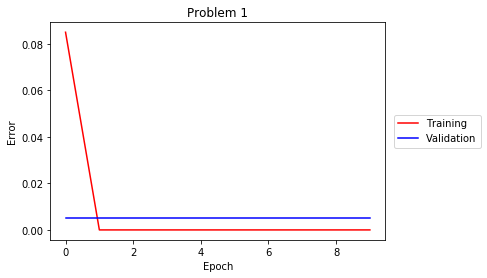

In [4]:
plt.title("Problem 1")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.30, 0.5))

#plt.title("Square")
#plt.xlabel("x")
#plt.ylabel("y")
#plt.plot([ i[0] for i in aux], [ i[1] for i in aux], 'ro')

In [5]:
data_set_4 = DataSet("data_set_4")
aux = []

if (os.path.isfile(data_set_4.name)):
    data_set_4.loadFile()

else:
    data_set_size_4 = 1000
    for i in range(0, data_set_size_4):
        t = 2 * np.pi * np.random.sample(1)[0]
        u = np.random.sample(1)[0] + np.random.sample(1)[0]
        r = 2-u if u > 1 else u
        x = [r*np.cos(t), r*np.sin(t)]
        aux.append(x)

        n = 0
        if(x[0] >= 0.0):
            n = 0 if x[1] >= 0.0 else 3
        else:
            n = 1 if x[1] >= 0.0 else 2

        n += 4 if np.absolute(x[1]) > 1.0 - np.absolute(x[0]) else 0

        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_4.add( Instance( x, y) )
        
    data_set_4.saveToFile()

In [10]:
sig_func = ActivationFunction("sigmoid")
net = NeuralNetwork(2, [2, 6, 6, 8], [sig_func, sig_func, sig_func, sig_func], 0.15)
data = net.trainDataSet(data_set_4, "stochastic", 500, momentum = 0.5, type = "class", print_info = True, tvt_ratio = [7, 2, 1])

|| Epoch: 148 || aining Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Validation Error: 1.00000 || Training Error: 1.00000 || Valida

|| Epoch: 295 || Training Error: 0.39429 || Validation Error: 0.52500 || Training Error: 0.39286 || Validation Error: 0.52500 || Training Error: 0.39286 || Validation Error: 0.52500 || Training Error: 0.39000 || Validation Error: 0.52500 || Training Error: 0.39000 || Validation Error: 0.52500 || Training Error: 0.38714 || Validation Error: 0.52500 || Training Error: 0.38429 || Validation Error: 0.53000 || Training Error: 0.38429 || Validation Error: 0.53000 || Training Error: 0.38429 || Validation Error: 0.53000 || Training Error: 0.38571 || Validation Error: 0.53000 || Training Error: 0.38571 || Validation Error: 0.53000 || Training Error: 0.38714 || Validation Error: 0.53000 || Training Error: 0.38714 || Validation Error: 0.53000 || Training Error: 0.38857 || Validation Error: 0.53000 || Training Error: 0.38857 || Validation Error: 0.53000 || Training Error: 0.38857 || Validation Error: 0.53000 || Training Error: 0.38857 || Validation Error: 0.53000 || Training Error: 0.38857 || Vali

|| Epoch: 442 || Training Error: 0.38000 || Validation Error: 0.39500 || Training Error: 0.37857 || Validation Error: 0.39500 || Training Error: 0.37429 || Validation Error: 0.39500 || Training Error: 0.37857 || Validation Error: 0.39000 || Training Error: 0.37571 || Validation Error: 0.39000 || Training Error: 0.37571 || Validation Error: 0.39000 || Training Error: 0.37571 || Validation Error: 0.39000 || Training Error: 0.37429 || Validation Error: 0.39000 || Training Error: 0.37143 || Validation Error: 0.39000 || Training Error: 0.37429 || Validation Error: 0.39000 || Training Error: 0.37714 || Validation Error: 0.39000 || Training Error: 0.37857 || Validation Error: 0.39000 || Training Error: 0.37714 || Validation Error: 0.39500 || Training Error: 0.37714 || Validation Error: 0.39000 || Training Error: 0.37714 || Validation Error: 0.39500 || Training Error: 0.37286 || Validation Error: 0.39000 || Training Error: 0.37143 || Validation Error: 0.39500 || Training Error: 0.36857 || Vali

|| Epoch: 500 || Training Error: 0.25857 || Validation Error: 0.28000 || Training Error: 0.27429 || Validation Error: 0.24000 || Training Error: 0.27571 || Validation Error: 0.24500 || Training Error: 0.26000 || Validation Error: 0.26500 || Training Error: 0.27000 || Validation Error: 0.29000 || Training Error: 0.25571 || Validation Error: 0.22500 || Training Error: 0.26286 || Validation Error: 0.26000 || Training Error: 0.26429 || Validation Error: 0.27000 || Training Error: 0.26000 || Validation Error: 0.27000 || Training Error: 0.25857 || Validation Error: 0.26500 || Training Error: 0.27286 || Validation Error: 0.24000 || Training Error: 0.26429 || Validation Error: 0.27000 || Training Error: 0.27143 || Validation Error: 0.27000 || Training Error: 0.28143 || Validation Error: 0.29000 || Training Error: 0.26000 || Validation Error: 0.28500 || Training Error: 0.26429 || Validation Error: 0.26500 || Training Error: 0.26571 || Validation Error: 0.26000 || Training Error: 0.26429 || Vali

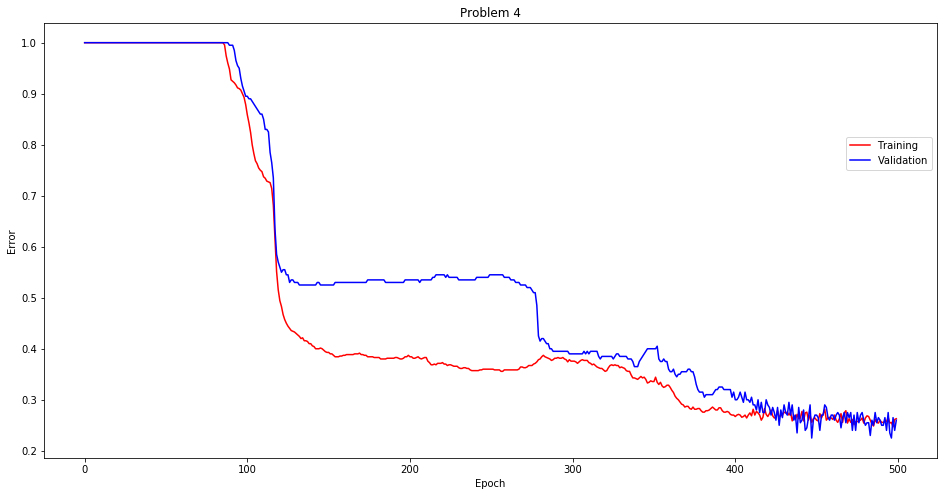

In [19]:
plt.figure(figsize=(16,8))
plt.title("Problem 4")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.0, 0.7))

#plt.title("Circle")
#plt.xlabel("x")
#plt.ylabel("y")
#plt.plot([ i[0] for i in aux], [ i[1] for i in aux], 'ro')

In [23]:
result_4 = open('result_4.txt', 'w')
for item in data[0]:
  result_4.write("%s\n" % item)
result_4.write("\n")

for item in data[1]:
  result_4.write("%s\n" % item)
result_4.write("\n")

for item in data[2]:
  result_4.write("%s\n" % item)
result_4.write("\n")
result_4.close()
